In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse-stockexchange/prices-split-adjusted.csv
/kaggle/input/nyse-stockexchange/fundamentals.csv
/kaggle/input/nyse-stockexchange/prices.csv
/kaggle/input/nyse-stockexchange/securities.csv


In [2]:
import os

for dirname, subdirs, files in os.walk('/kaggle/input'):
    print(dirname)
    for f in files:
        print("   ", f)


/kaggle/input
/kaggle/input/nyse-stockexchange
    prices-split-adjusted.csv
    fundamentals.csv
    prices.csv
    securities.csv


In [3]:
import pandas as pd

prices = pd.read_csv(
    '/kaggle/input/nyse-stockexchange/prices-split-adjusted.csv'
)

prices['date'] = pd.to_datetime(prices['date'])
prices.head()


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
num_stocks = prices['symbol'].nunique()
start_date = prices['date'].min()
end_date = prices['date'].max()

num_stocks, start_date, end_date


(501, Timestamp('2010-01-04 00:00:00'), Timestamp('2016-12-30 00:00:00'))

The dataset covers historical price data for hundreds of NYSE-listed stocks
over multiple years, making it suitable for long-term market trend analysis.


In [5]:
market_trend = prices.groupby('date')['close'].mean()


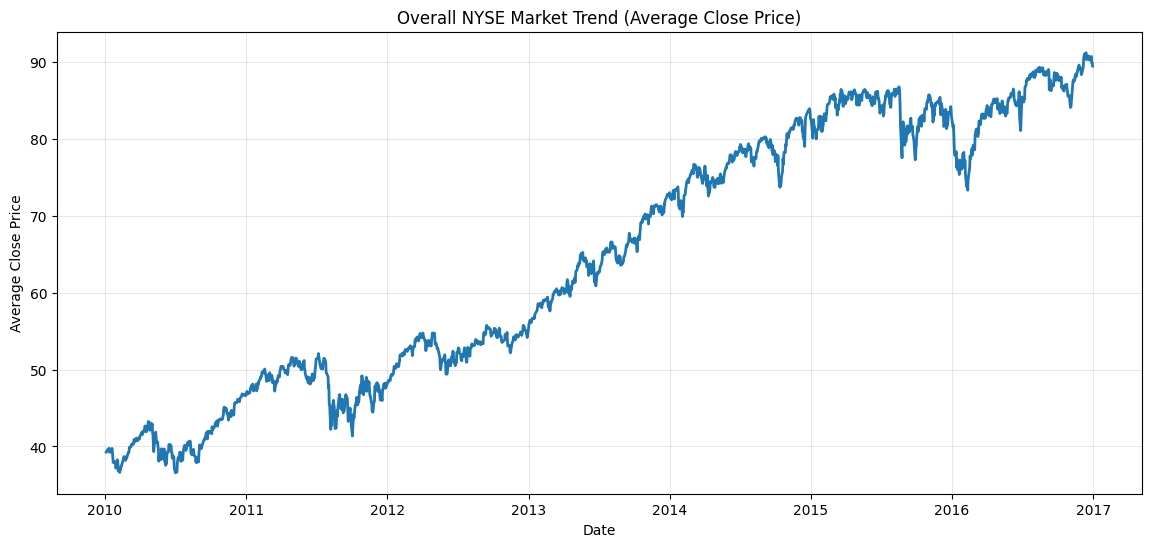

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(market_trend, linewidth=2)
plt.title("Overall NYSE Market Trend (Average Close Price)")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.grid(alpha=0.3)
plt.show()


The market trend shows periods of sustained growth and decline, reflecting
bullish and bearish phases in the NYSE over time.


In [7]:
# Calculate daily return (mandatory for Phase 4)
prices = prices.sort_values(['symbol', 'date'])
prices['daily_return'] = prices.groupby('symbol')['close'].pct_change()


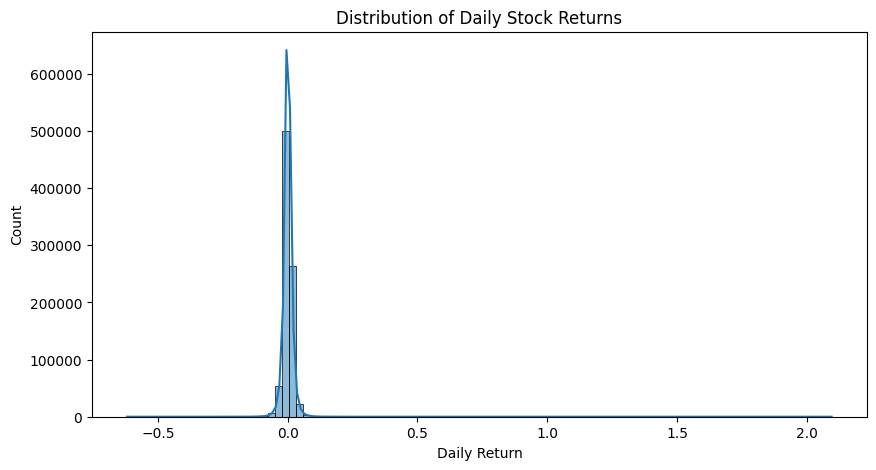

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(prices['daily_return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Stock Returns")
plt.xlabel("Daily Return")
plt.show()


### Insight
Most daily stock returns are centered around zero, with occasional extreme
positive and negative values indicating periods of high market volatility.


In [9]:
avg_returns = (
    prices.groupby('symbol')['daily_return']
    .mean()
    .sort_values()
)


In [10]:
top_losers = avg_returns.head(10)
top_gainers = avg_returns.tail(10)

top_gainers, top_losers


(symbol
 STZ     0.001460
 AVGO    0.001520
 ALK     0.001533
 FB      0.001637
 ULTA    0.001761
 AAL     0.001764
 URI     0.001796
 REGN    0.001929
 NFLX    0.002228
 EVHC    0.002507
 Name: daily_return, dtype: float64,
 symbol
 RIG    -0.000589
 SWN    -0.000444
 KMI    -0.000356
 SPLS   -0.000339
 WRK    -0.000309
 NAVI   -0.000291
 FTR    -0.000261
 NWSA   -0.000230
 NWS    -0.000189
 MOS    -0.000174
 Name: daily_return, dtype: float64)

A small subset of stocks significantly outperforms the broader market,
while others consistently underperform, highlighting unequal return
distribution across stocks.


In [11]:
stock = prices[prices['symbol'] == 'AAPL']


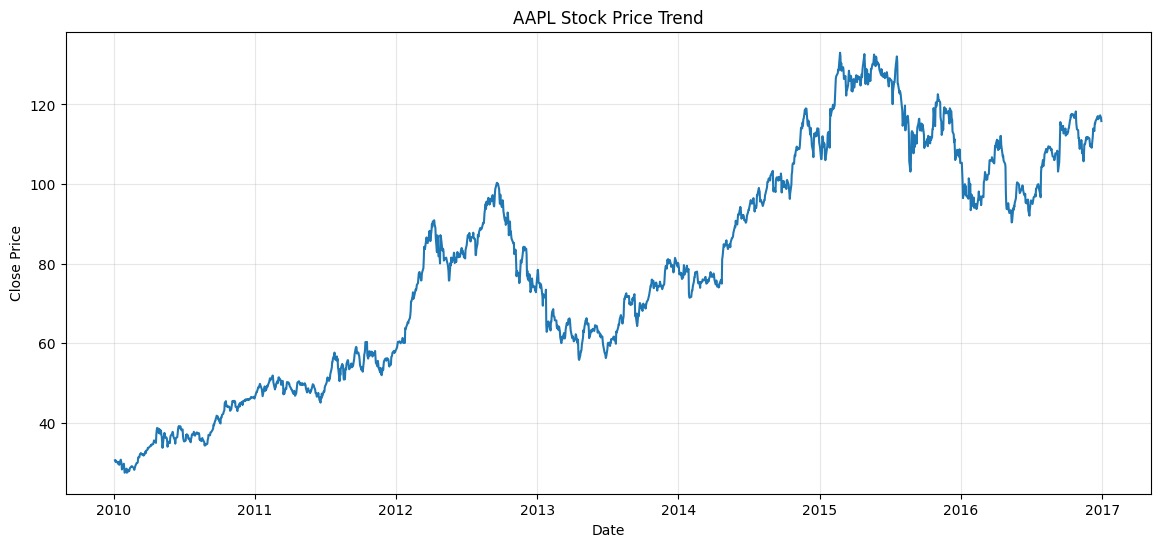

In [12]:
plt.figure(figsize=(14,6))
plt.plot(stock['date'], stock['close'])
plt.title("AAPL Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(alpha=0.3)
plt.show()


The stock demonstrates long-term growth with intermittent volatility,
illustrating how strong fundamentals can drive sustained performance.


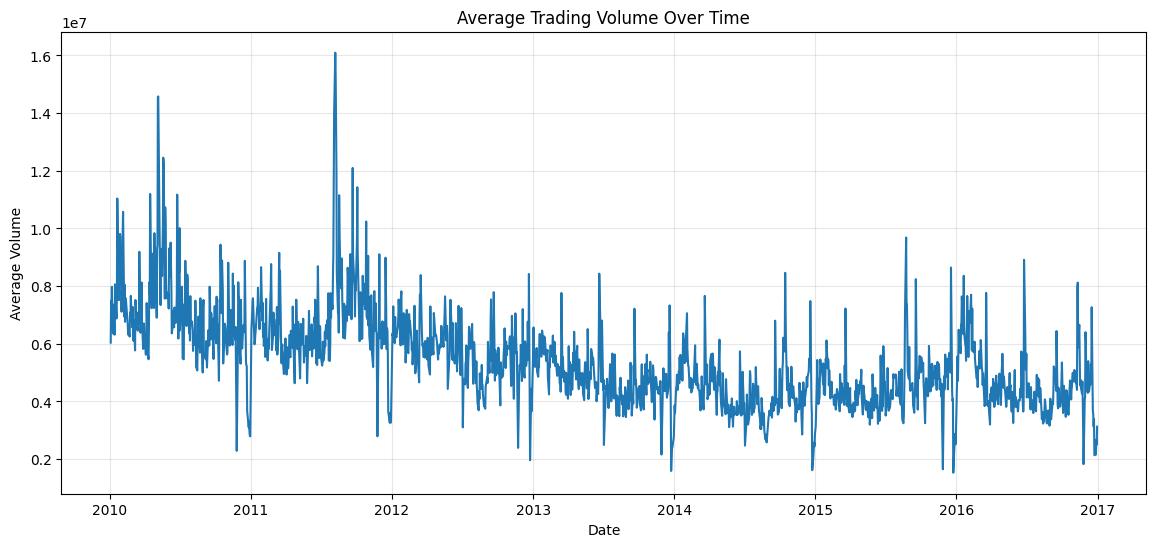

In [13]:
volume_trend = prices.groupby('date')['volume'].mean()

plt.figure(figsize=(14,6))
plt.plot(volume_trend)
plt.title("Average Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Average Volume")
plt.grid(alpha=0.3)
plt.show()


Spikes in trading volume often align with periods of increased market
uncertainty or major market events.


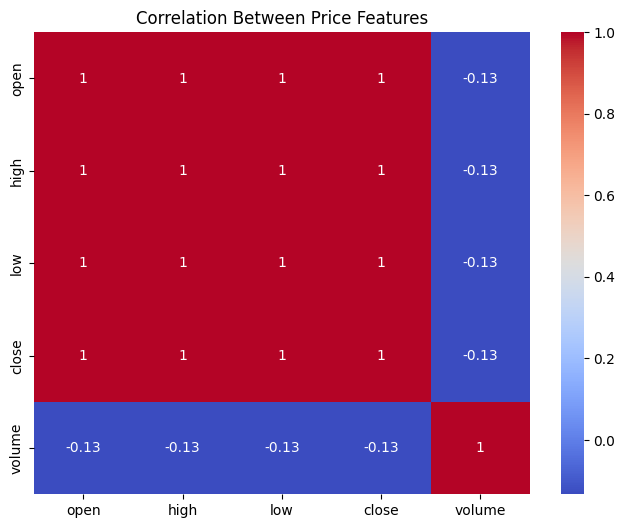

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(
    prices[['open','high','low','close','volume']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between Price Features")
plt.show()


Price-related features are highly correlated, while trading volume shows
a weaker relationship, indicating independent liquidity behavior.
